In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Dell\tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# handle null value by droping mean/median/ mode
# handle the null of AGE
median_of_age=df['Age'].median()
median_of_age

27.0

In [9]:
#handle the null value of Fare
median_of_fare=df['Fare'].median()
median_of_fare

14.4542

In [14]:
df2=df['Age'].fillna(median_of_fare,inplace=True)

In [15]:
# handle the null value of cabin
mode_cabin=df['Cabin'].mode()
mode_cabin

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [16]:
df2=df['Cabin'].fillna(mode_cabin[0],inplace=True)

<AxesSubplot:>

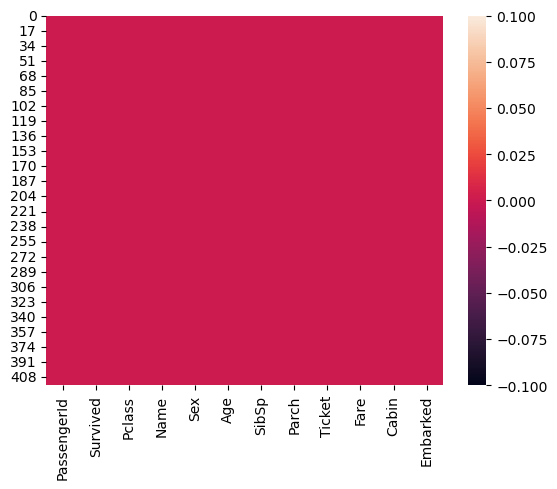

In [17]:
# after handling the null value of the data 
sns.heatmap(df.isnull())

<AxesSubplot:>

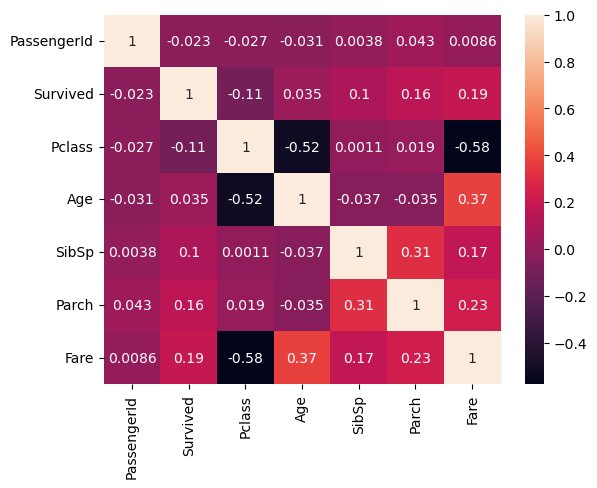

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q


### Male and Female

In [20]:
len(df['Sex'])

418

In [25]:
# total count of male
df[df['Sex']=='male']['Sex'].count()

266

In [26]:
# total count of femnale
df[df['Sex']=='female']['Sex'].count()

152

In [27]:
per_of_male=(df[df['Sex']=='male']['Sex'].count()/len(df['Sex']))*100
per_of_male

63.63636363636363

In [28]:
per_of_female=(df[df['Sex']=='female']['Sex'].count()/len(df['Sex']))*100
per_of_female

36.36363636363637

<AxesSubplot:xlabel='Sex', ylabel='count'>

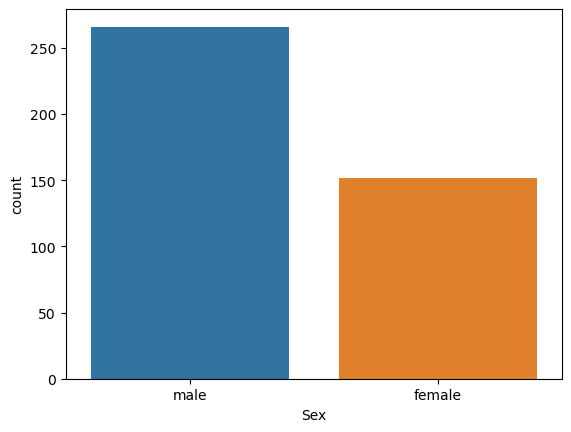

In [30]:
sns.countplot(x=df['Sex'],data=df)

### Pclass on the bases of gender


<AxesSubplot:xlabel='Sex', ylabel='count'>

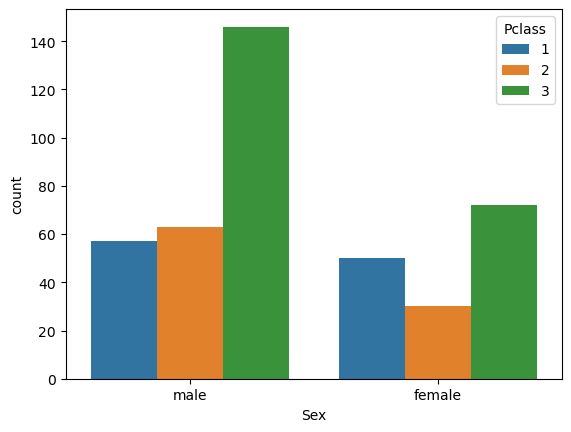

In [31]:
# see people on the basis of class
sns.countplot(x=df['Sex'], data=df,hue='Pclass')

In [34]:
# see survived and unsurvived
per_of_survived=(df[df['Survived']==1]['Survived'].count()/df['Survived'].count())*100
per_of_survived

36.36363636363637

In [35]:
percentage_of_unsurvived =(df[df['Survived']==0]['Survived'].count()/df['Survived'].count())*100
percentage_of_unsurvived

63.63636363636363

<AxesSubplot:xlabel='Sex', ylabel='count'>

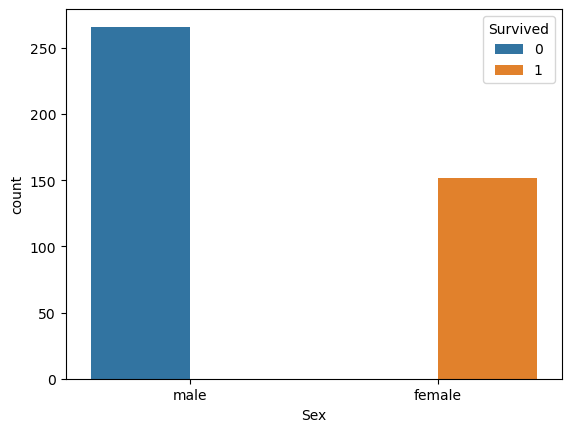

In [33]:
# see survived and unservived on the bases of gender

sns.countplot(x=df['Sex'], data=df,hue='Survived')